# Prequisites

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_img(img):
    new_img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(new_img)
    plt.show()

# Task 1

In [39]:
capture = cv2.VideoCapture("./assets/Video1.mp4")
while True:
    ret, frame = capture.read()
    if ret:
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        # extract blue
        hsv_lower = np.array([100, 190, 150])
        hsv_upper = np.array([130, 240, 215])
        extracted_image = cv2.inRange(hsv_frame, hsv_lower, hsv_upper)
        # threshold extracted image to turn to mask
        ret, mask = cv2.threshold(extracted_image, 127, 255, 0)
        picture = cv2.bitwise_and(frame, frame, mask=mask)
        cv2.imshow('image', picture)
        cv2.imshow("original", frame)
        if cv2.waitKey(20) == ord('q'):
            break

    else:
        break
print("Finished")
capture.release()
cv2.destroyAllWindows()



Finished


# Task 2

In [74]:
image = cv2.imread("./assets/mountain.jpg")
kernel_shape = 20
sigma = 15

In [75]:
# iniitializing kernel using gausian equation
center=int((kernel_shape-1)/2)
kernel = np.zeros((kernel_shape, kernel_shape))
total = 0
constant = 1/(2*np.pi * sigma**2)
for x in range(kernel_shape):
    for y in range(kernel_shape):
        kernel[x, y] = constant * np.exp(-((x - center)**2 + (y - center)**2) / (2 * sigma**2))
        total += kernel[x, y]

for x in range(kernel_shape):
    for y in range(kernel_shape):
        kernel[x, y] = kernel[x, y] / total
    

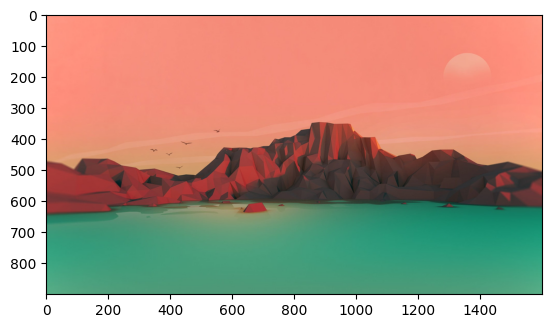

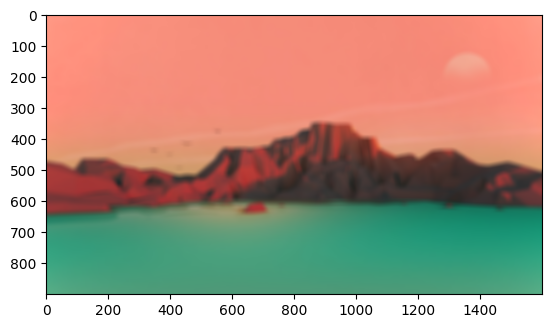

In [76]:
# Apply filter and display image
img_avg = cv2.filter2D(image, -1, kernel)

display_img(image)
display_img(img_avg)

# Task 3

To get Blue color for Task 1


In [33]:
image = cv2.imread("./assets/carpet.png")
# define mouse callback function
def mouse_click(event, x, y, flags, param):
    global c_image
    if event == cv2.EVENT_LBUTTONDOWN:
        color = image[y, x]
        c_image[:] = color
        hsv_color = cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_BGR2HSV)
        c_image = cv2.putText(c_image, str(hsv_color), (10, 270), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, cv2.LINE_AA)

Task 

In [36]:
image = cv2.imread("./assets/mountain.jpg")
c_image = np.zeros((300, 300, 3), np.uint8)

# define mouse callback function
def mouse_click(event, x, y, flags, param):
    global c_image
    if event == cv2.EVENT_LBUTTONDOWN:
        color = image[y, x]
        c_image[:] = color
        c_image = cv2.putText(c_image, str(color), (10, 270), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, cv2.LINE_AA)



In [37]:
cv2.namedWindow('Image')
cv2.setMouseCallback("Image", mouse_click)
while(True):
    cv2.imshow("Image", image)
    cv2.imshow('color', c_image)
    key = cv2.waitKey(1)
    if key == 27:
        break
cv2.destroyAllWindows()